In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from scipy import stats
from sklearn.pipeline import make_pipeline


In [58]:
df=pd.read_csv('C:/Users/HP/Desktop/InternSavy/Clustering Techniques for dataset using ML/Mall_Customers.csv')

In [59]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [61]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [62]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [63]:
df.shape

(200, 5)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [65]:
df=pd.DataFrame(df)
df.columns=['CustomerID','Genre','Age','Annual Income','Spending Score']
df

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


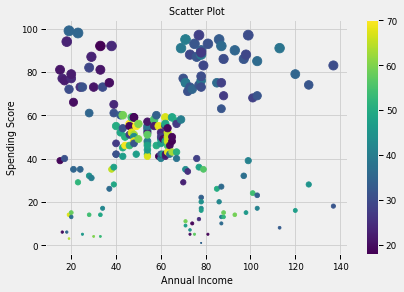

In [66]:
plt.scatter(df['Annual Income'],df['Spending Score'],c=df['Age'],s=df['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.title('Scatter Plot')
plt.colorbar()
plt.show()

<AxesSubplot:>

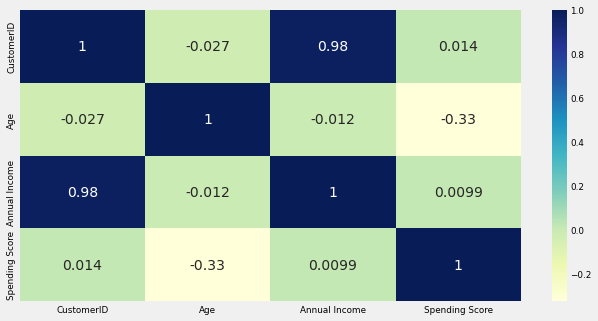

In [118]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu" , ax=ax)

In [68]:
color=[]
for i in range(200):
    if df.loc[i].at['Genre']=='Male':
        color.append(1)
    else:
        color.append(2)
print(color)

[1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1]


In [69]:
df1 = df['Gender_label']
df

KeyError: 'Gender_label'

In [70]:
plt.scatter(df['Annual Income'],df['Spending Score'],c=df['Gender_label'],s=df['Age'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter Plot')
plt.colorbar()
plt.show()

KeyError: 'Gender_label'

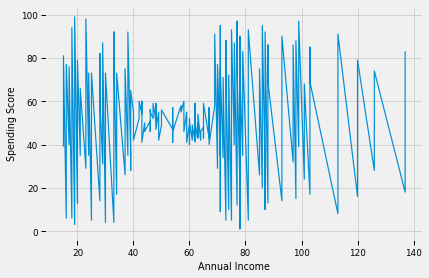

In [71]:
plt.plot(df['Annual Income'],df['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

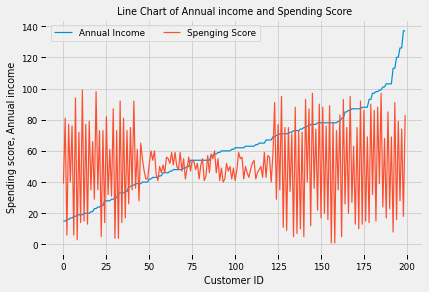

In [72]:
plt.plot(df['Annual Income'])
plt.plot(df['Spending Score'])
plt.title('Line Chart of Annual income and Spending Score')
plt.xlabel('Customer ID')
plt.ylabel('Spending score, Annual income')
plt.legend(["Annual Income","Spenging Score"],loc="best",ncol=2)
plt.show()

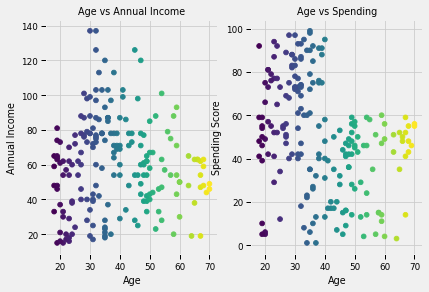

In [73]:
plt.subplot(121)
plt.scatter(df['Age'],df['Annual Income'],c=df['Age'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')
plt.subplot(122)
plt.scatter(df['Age'],df['Spending Score'],c=df['Age'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending')
plt.show()

Text(0.5, 1.0, 'Bar chart')

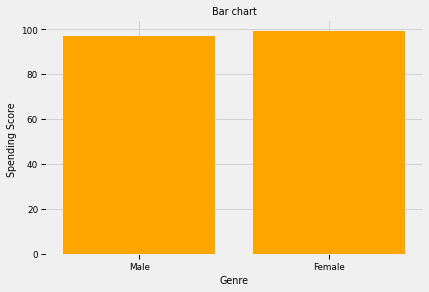

In [74]:
plt.bar(df['Genre'],df['Spending Score'],color=('orange'))
plt.xlabel('Genre')
plt.ylabel('Spending Score ')
plt.title('Bar chart')
#color=('red','green','blue','black','yellow','pink','cyan')

Text(0.5, 1.0, 'Histogram of Annual Income')

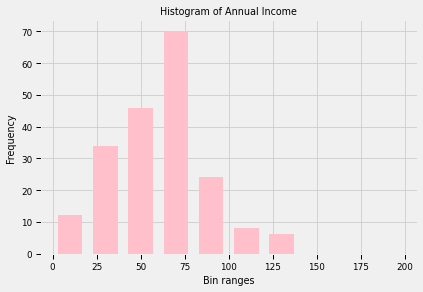

In [75]:
plt.hist(df['Annual Income'],range=(0,200),rwidth=0.7,color=('pink'))
plt.xlabel('Bin ranges')
plt.ylabel('Frequency ')
plt.title('Histogram of Annual Income')

Text(0.5, 1.0, 'Histogram of Spending Score')

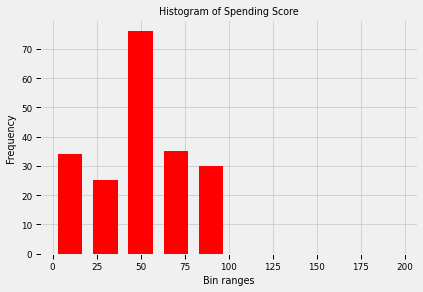

In [76]:
plt.hist(df['Spending Score'],range=(0,200),rwidth=0.7,color=('red'))
plt.xlabel('Bin ranges')
plt.ylabel('Frequency ')
plt.title('Histogram of Spending Score')

Text(0.5, 1.0, 'Histogram of Ages')

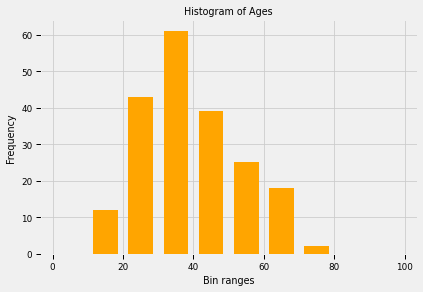

In [77]:
plt.hist(df['Age'],range=(0,100),rwidth=0.7,color=('orange'))
plt.xlabel('Bin ranges')
plt.ylabel('Frequency ')
plt.title('Histogram of Ages')

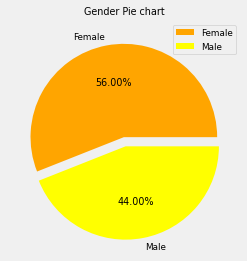

In [78]:
labels=['Female','Male']
colors=['Orange','Yellow']
explode=[0,0.1]
plt.title('Gender Pie chart')
plt.pie(df['Genre'].value_counts(),explode=explode,labels=labels,colors=colors,autopct='%0.2f%%')
plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


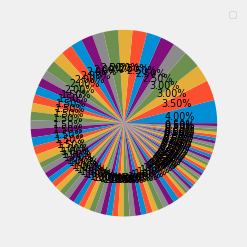

In [79]:
plt.pie(df['Spending Score'].value_counts(),autopct='%0.2f%%')
plt.legend()
plt.show()

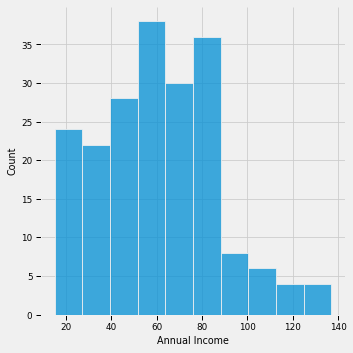

In [80]:
sns.displot(df['Annual Income'])

<AxesSubplot:xlabel='Annual Income', ylabel='Count'>

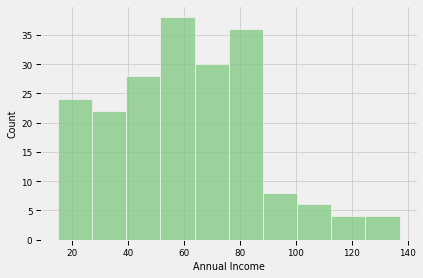

In [81]:
sns.histplot(df['Annual Income'])

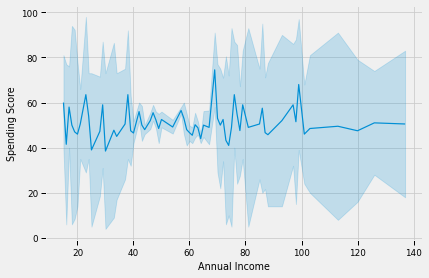

In [82]:
sns.lineplot(x=df['Annual Income'],y=df['Spending Score'])
plt.show()

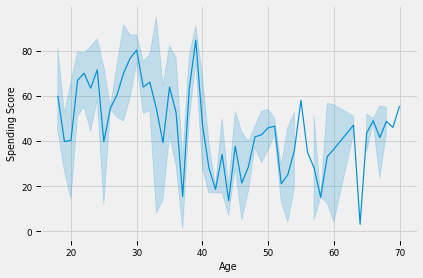

In [83]:
sns.lineplot(x=df['Age'],y=df['Spending Score'])
plt.show()

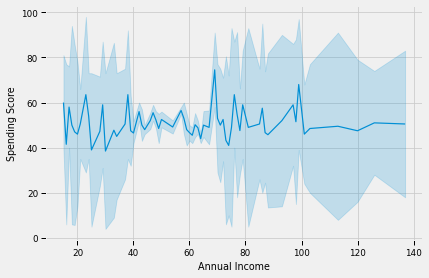

In [84]:
sns.lineplot(x=df['Annual Income'],y=df['Spending Score'])
# Setting the scale of the plot
sns.set_context("paper")
 
plt.show()

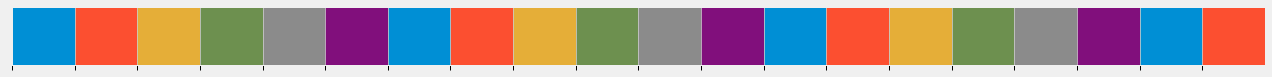

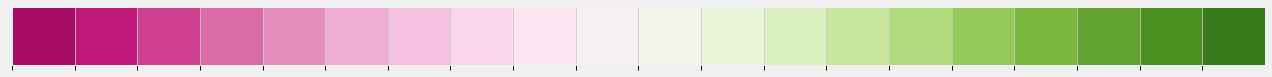

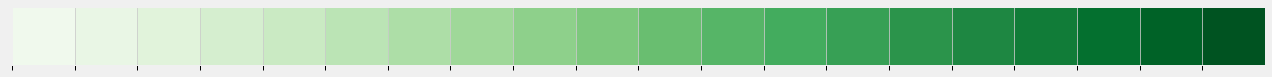

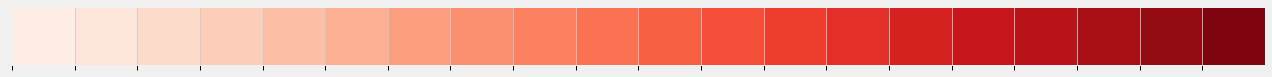

In [85]:
palette=sns.color_palette(n_colors=20)
palette1 = sns.color_palette('PiYG', 20)
palette2 = sns.color_palette('Greens', 20)
palette3 = sns.color_palette('Reds', 20)
sns.palplot(palette)
sns.palplot(palette1)
sns.palplot(palette2)
sns.palplot(palette3)

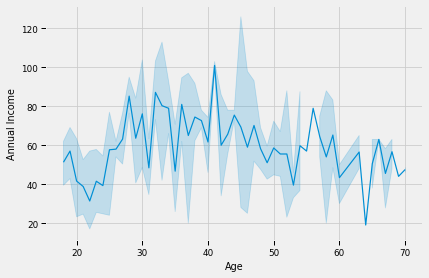

In [86]:
sns.lineplot(x=df['Age'],y=df['Annual Income'])
sns.set_palette('Accent')

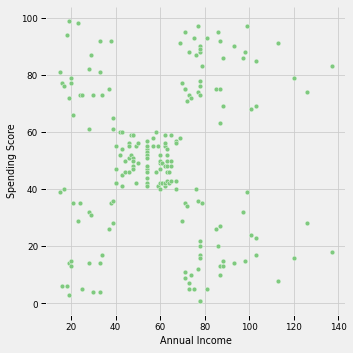

In [87]:
sns.relplot(x=df['Annual Income'],y=df['Spending Score'])
plt.show()

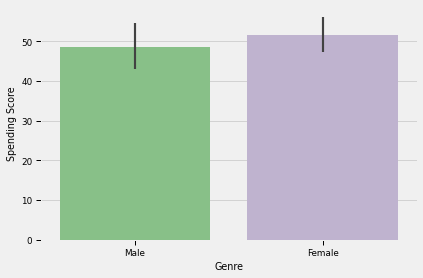

In [88]:
sns.barplot(x=df['Genre'],y=df['Spending Score'])
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='count'>

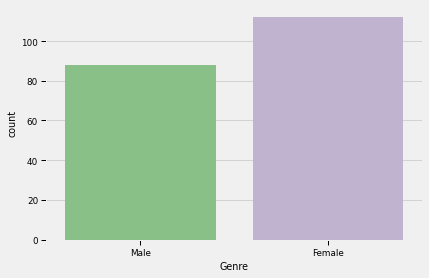

In [89]:
sns.countplot(x=df['Genre'])

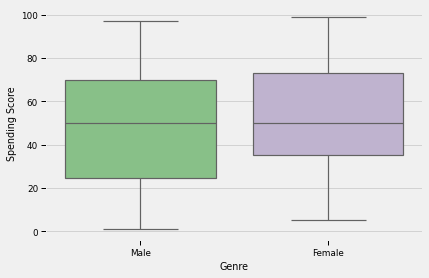

In [90]:
sns.boxplot(x=df['Genre'],y=df['Spending Score'])
plt.show()

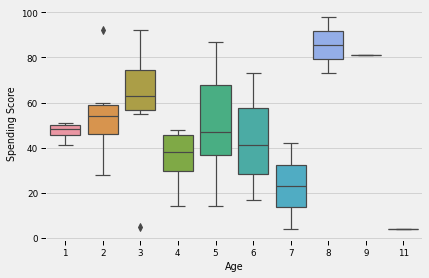

In [91]:
sns.boxplot(x=df['Age'].value_counts(),y=df['Spending Score'])
plt.show()

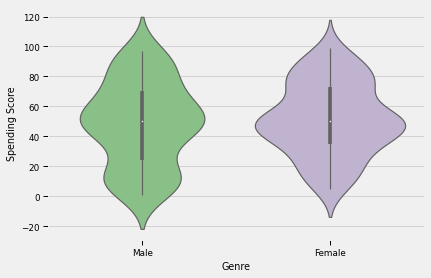

In [92]:
sns.violinplot(x=df['Genre'],y=df['Spending Score'])
plt.show()

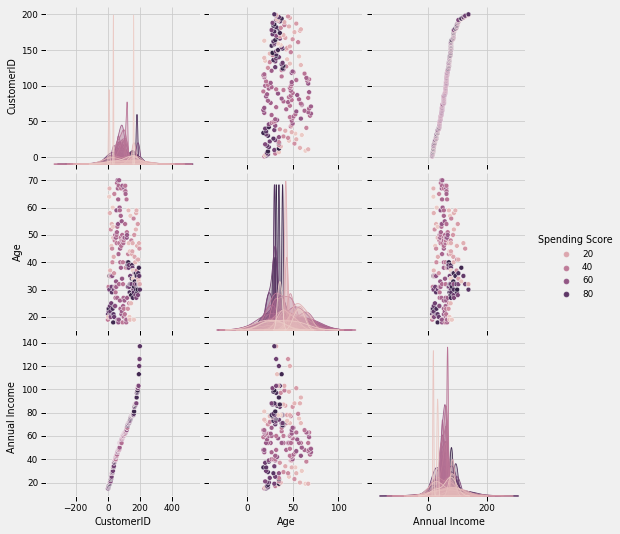

In [93]:
sns.pairplot(data=df,hue='Spending Score')
plt.show()

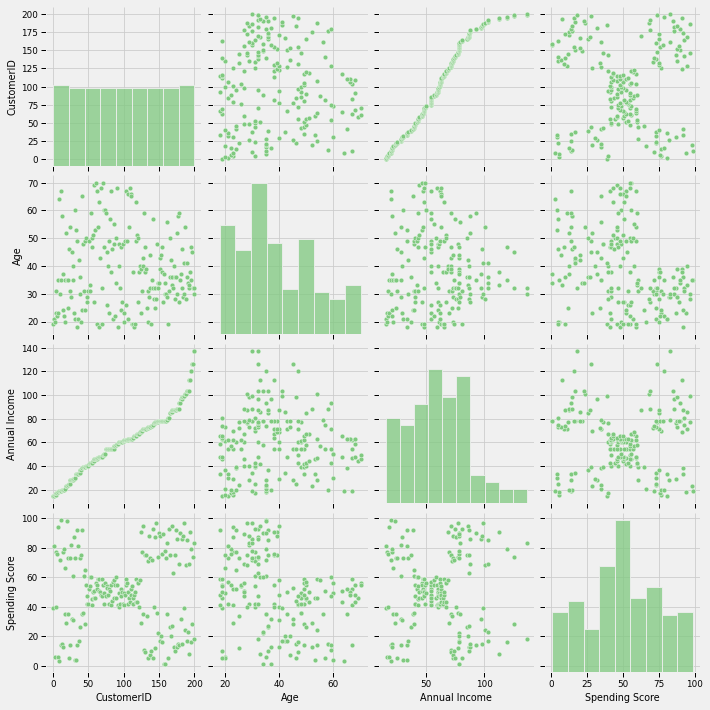

In [94]:
sns.pairplot(data=df)
plt.show()

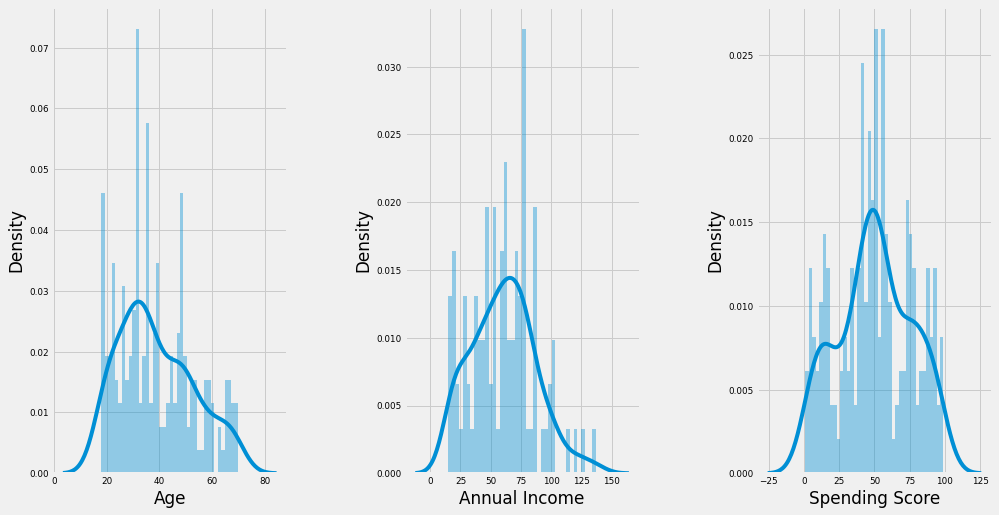

In [95]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight") #for styling the graph according to our needs
plt.figure(1,(15,8))
n=0
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x], bins=40)
plt.show()

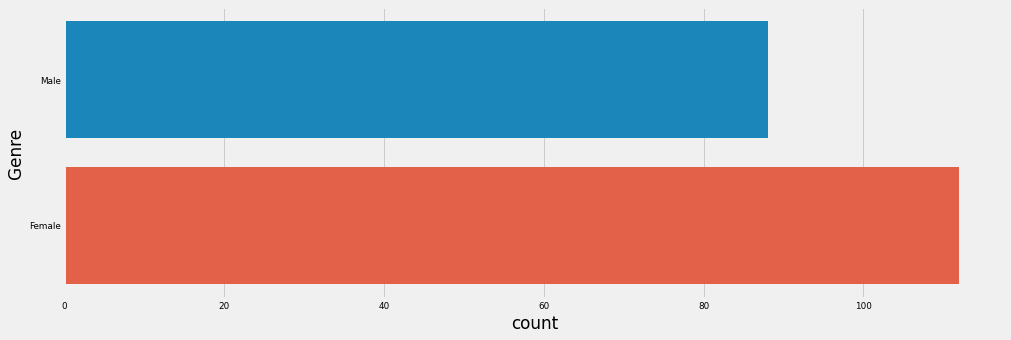

In [96]:
  plt.figure(1,(15,5))
sns.countplot(y="Genre",data=df)
plt.show()

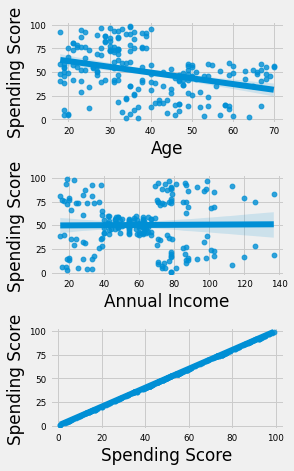

In [97]:

import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight") #for styling the graph according to our needs
plt.figure(1,(15,7))
n=0
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n+=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.regplot(x=x,y=y,data=df)
plt.show()

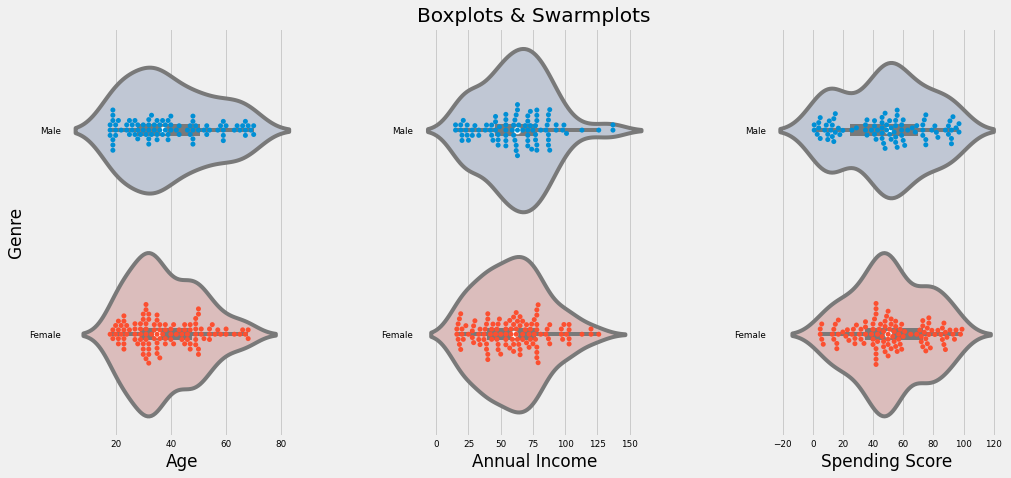

In [98]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income' , 'Spending Score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Genre' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Genre' , data = df)
    plt.ylabel('Genre' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [109]:
x = df.iloc[:, [2, 3]].values

In [110]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  

In [115]:
#Using for loop for iterations from 1 to 10.  
for i in range(1, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 


AttributeError: 'NoneType' object has no attribute 'split'

In [113]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

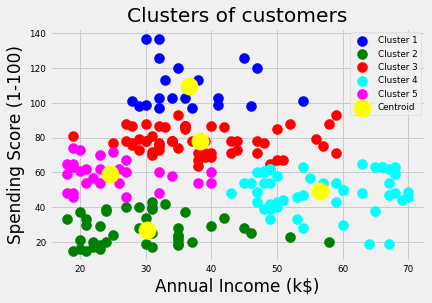

In [114]:
#visualizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  


In [120]:
df['Spending Score'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score, Length: 84, dtype: int64

In [121]:
labelencoder = LabelEncoder()
df["Genre"] = labelencoder.fit_transform(df["Genre"])
df

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


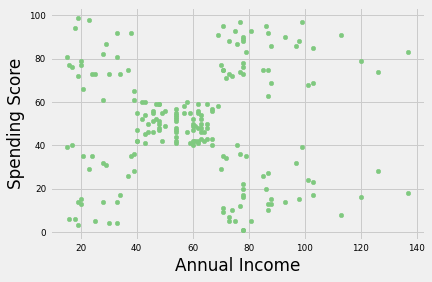

In [123]:
df.plot(kind = 'scatter', x='Annual Income' , y='Spending Score')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


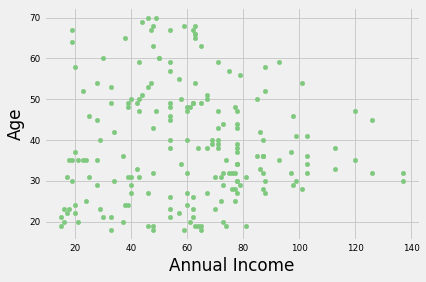

In [124]:
df.plot(kind = 'scatter', x='Annual Income' , y='Age')
plt.show()

In [125]:
from sklearn.cluster import KMeans

In [126]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [127]:
centers = kmeans.cluster_centers_
centers

array([[ 96.98591549,   0.46478873,  43.1971831 ,  59.35211268,
         50.5915493 ],
       [166.5       ,   0.45588235,  36.04411765,  88.91176471,
         50.20588235],
       [ 31.01639344,   0.39344262,  36.91803279,  30.36065574,
         49.73770492]])

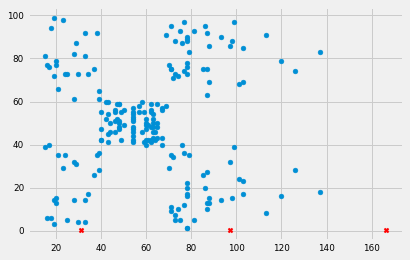

In [129]:
plt.scatter(df["Annual Income"] , df['Spending Score'])
plt.scatter(centers[:,0], centers[:,1], marker="X", color = "red")
plt.show()